# Advanced Statistic
created by Ari Sulistiyo Prabowo

This notebook is created to teach student about an advanced statistic. All the code is free to reuse by everyone.

**Contents**
- Statistical Sampling
- Hypothesis Testing
- A/B Testing
_____

In [ ]:
# import library
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read dataset
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Transformer.csv")
data.head()

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
0,0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0,Not Working
1,1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0,Not Working
2,2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0,Not Working
3,3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0,Not Working
4,4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0,Not Working


## **Statistical Sampling**
There are three statistical sampling in applied machine learning
- Simple Random Sampling
- Systematic Sampling
- Stratified Sampling

Let's code!!
_____

### Simple Random Sampling

In [ ]:
data.sample(n=100)

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
335,335,7,1200,51100,2,52,1340,0,67,0,0.0,3.83,28,54,24,13.4,51.0,Working
211,211,70,371,40100,1,12,1750,7,117,0,0.0,22.00,36,53,62,16.2,51.0,Not Working
407,407,0,302,51300,4,25,1510,3,292,0,0.0,1.00,32,49,33,13.4,51.0,Working
262,262,33,2000,48700,2,53,486,0,184,0,0.0,2.97,30,49,47,13.4,51.0,Working
283,283,24,257,55700,2,47,495,4,105,0,0.0,3.17,31,56,15,13.4,51.0,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,48,71,21093,3,36,673,4,144,0,0.0,2.56,30,58,26,13.4,51.0,Working
380,380,4,10600,49300,1,364,2020,4,0,0,0.0,1.00,43,56,76,13.4,51.0,Working
320,320,8,16200,52900,4,434,1890,0,0,0,0.0,1.00,32,53,14,13.4,51.0,Working
224,224,54,281,44100,4,89,833,4,126,0,0.0,1.00,33,55,17,13.5,51.0,Not Working


### **Systematic Sampling**

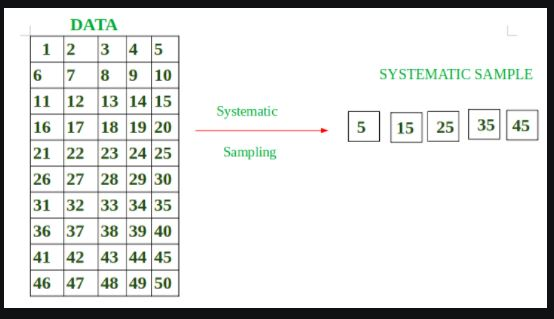

In [ ]:
indexes = np.arange(0, len(data), step=5)
data.iloc[indexes]

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
0,0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0,Not Working
5,5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,75.6,6.0,Not Working
10,10,4,26100,60600,1,206,1440,13,0,13,5.0,1.32,40,56,4,63.4,6.0,Not Working
15,15,13200,1120,32800,2650,156,2240,16400,1610,1510,0.0,1.00,45,58,22,60.5,19.0,Not Working
20,20,590,23200,63900,949,209,51,828,168,582,0.0,1.00,45,55,4,60.5,6.9,Not Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,11,1770,48600,0,30,593,0,60,0,0.0,3.97,31,58,29,13.4,51.0,Working
450,450,17,262,47400,2,46,1050,4,97,0,0.0,1.00,33,57,26,13.4,51.0,Working
455,455,17,564,14600,5,320,2450,0,0,0,1.0,1.07,45,52,6,13.4,19.0,Working
460,460,12,151,48200,2,34,569,4,48,0,0.0,1.00,31,58,20,13.4,51.0,Working


### **Stratified Sampling**

In [ ]:
data.groupby(['event'], as_index=True).apply(lambda x: x.sample(n=200, random_state=1))

Unnamed: 0  Hydrogen  ...  Life expectation        event
event                                  ...                               
Not Working 200         200       227  ...              50.8  Not Working
            169         169         0  ...              19.0  Not Working
            234         234        48  ...              51.0  Not Working
            39           39      6200  ...              29.8  Not Working
            78           78         5  ...              17.9  Not Working
...                     ...       ...  ...               ...          ...
Working     350         350         6  ...              51.0      Working
            442         442        18  ...              51.0      Working
            243         243        40  ...              51.0      Working
            295         295        21  ...              51.0      Working
            363         363         5  ...              51.0      Working

[400 rows x 18 columns]

### **Hypothesis Testing**
- Z-test
- T-test
_____

#### Z-test
Let's say we need to determine if the CO2 that is generated by transformer when it is working has average score higher than 2150. We have the information that the standard deviation for the working transformer of CO2 is 2343. So, we collect the 20 data of CO2 of the working transformer by using random samples.

Set tge significance level to be 0.05

In [ ]:
working = data[data['event'] == 'Working']
working_co2_mean = working['CO2'].mean()
working_co2_std = working['CO2'].std()

print('The average is {:.2f}'.format(working_co2_mean))
print('The standard deviation is {:.2f}'.format(working_co2_std))

The average is 1504.73
The standard deviation is 2126.45


In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level


# get the random sample
sample_data_z = working['CO2'].sample(n=35)

# ztest hypothesis
ztest_Score, pvalue = ztest(x1=sample_data_z, x2=None, value=working_co2_mean)
display(ztest(x1=sample_data_z, x2=None, value=working_co2_mean))

# test
if alpha < pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))

(0.7138028751273391, 0.47534908157301725)

Reject the hypothesis
Because the pvalue 0.48 > 0.05


#### T-test

Let's say we want to determine if the average of Oxygen more than xxx in the working transformer. We don't have any information about variance (or standard deviation) for the working transformer. To perform a t-test, we randomly collect 10 data and the confidence level is 95%.

In [ ]:
working = data[data['event'] == 'Working']
population_O2_working = working['Oxigen'].mean()

print('The average is {:.2f}'.format(population_O2_working))

The average is 7273.37


In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level


# get the random sample
sample_data_t = working['Oxigen'].sample(n=20)

# ttest hypothesis
ttest_Score, pvalue = stats.ttest_1samp(sample_data_t, population_O2_working)

# test
if alpha < pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.46 > 0.05


#### T-test - Two sample

We want to investigate whether the means of oxygen both working and not working transformer are the same. We don't have any informaton of variance for the working and not working transformer. We set the confidence level at 95%

In [ ]:
# Oxygen - working transformer
working = data[data['event']=="Working"]
p_working_oxygen = working['Oxigen'].mean()
s_working_oxygen = working['Oxigen'].sample(30)

# Oxygen - not working transformer
not_working = data[data['event']=="Not Working"]
p_n_working_oxygen = not_working['Oxigen'].mean()
s_n_working_oxygen = not_working['Oxigen'].sample(30)

# Difference between population 
difference = p_working_oxygen-p_n_working_oxygen
# print('Difference between population mean: {:.2f}'.format(difference))

# ttest hypothesis
ttest_Score, pvalue = stats.ttest_ind(a=s_working_oxygen, b=s_n_working_oxygen)

# test
if alpha < pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.42 > 0.05
